In [1]:
# インポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, isspmatrix
import scipy.sparse as sp
import statsmodels.api as sm
from decimal import Decimal, ROUND_HALF_UP
from sklearn.metrics import mean_squared_error
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ロジスティック回帰スクラッチ

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

In [2]:
# 雛形

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return

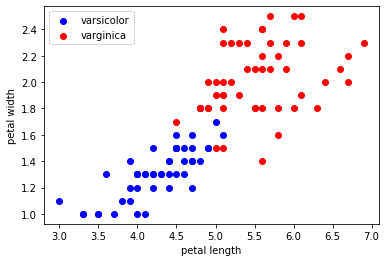

In [58]:
# irisデータセットを読み込みデータとして利用する。
# ここではpetal_width, petal_length, varsicolor, varginicaのみ利用する。varsicolor=0, varginica=1

iris = load_iris()
X = iris.data[50:, 2:]
y = iris.target[50:] -1
# plt.figure(figsize=(10, 5))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='varsicolor')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='varginica')
plt.legend();

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.5, random_state=50)
print(X_train, X_test, y_train, y_test)

# 標準化する

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std, X_test_std)

[[4.7 1.4]
 [4.2 1.3]
 [5.  1.7]
 [4.3 1.3]
 [4.5 1.5]
 [5.3 2.3]
 [3.3 1. ]
 [4.8 1.8]
 [5.3 1.9]
 [5.2 2. ]
 [4.9 1.8]
 [4.9 1.8]
 [5.  2. ]
 [3.5 1. ]
 [4.7 1.4]
 [5.1 1.9]
 [3.5 1. ]
 [5.7 2.1]
 [6.7 2.2]
 [5.5 1.8]
 [5.1 2. ]
 [5.6 1.4]
 [6.1 2.3]
 [3.8 1.1]
 [5.4 2.1]
 [3.9 1.1]
 [5.1 1.5]
 [5.1 2.4]
 [4.6 1.4]
 [4.1 1.3]
 [3.7 1. ]
 [3.3 1. ]
 [4.8 1.8]
 [4.7 1.6]
 [4.8 1.4]
 [4.5 1.6]
 [5.6 2.1]
 [6.9 2.3]
 [4.9 2. ]
 [4.9 1.5]
 [4.5 1.3]
 [4.9 1.5]
 [5.9 2.3]
 [5.7 2.3]
 [4.6 1.5]
 [5.7 2.5]
 [5.1 1.6]
 [4.2 1.5]
 [5.  1.9]
 [3.  1.1]] [[6.1 1.9]
 [5.8 1.6]
 [4.4 1.4]
 [4.4 1.4]
 [4.  1.3]
 [4.4 1.2]
 [5.6 1.8]
 [4.1 1. ]
 [6.3 1.8]
 [6.  2.5]
 [4.5 1.5]
 [5.  1.5]
 [5.5 1.8]
 [4.5 1.5]
 [4.3 1.3]
 [4.  1.3]
 [4.1 1.3]
 [5.9 2.1]
 [4.6 1.3]
 [4.5 1.5]
 [4.2 1.3]
 [6.7 2. ]
 [6.1 2.5]
 [5.1 2.3]
 [5.4 2.3]
 [3.6 1.3]
 [4.  1.3]
 [4.  1. ]
 [5.8 1.8]
 [5.6 2.2]
 [5.2 2.3]
 [5.6 2.4]
 [4.8 1.8]
 [5.8 2.2]
 [5.6 2.4]
 [4.  1.2]
 [3.9 1.2]
 [4.7 1.2]
 [4.4 1.3]
 [5.5 2.1]
 [3.9 1.4

# 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。



線形回帰の仮定関数は次の式でした。



まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。



$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル

In [6]:
# シグモイド関数にいれるための線形結合を計算する関数
def liner_hypothesis(X):
        """
        線形結合を計算する。
        Xとthetaはfit_interceptをTrueとする。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        theta : 次の形のndarray, shape(n_samples, n_features)
          係数

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形結合による予測値、hθ(X)

        """
        X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
        theta = np.random.normal(1, 0.5, (X.shape[1]))
        print(theta)
        #z = np.dot(X, theta)
        z = X @ theta
        
        return z, theta

# シグモイド関数
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))
    

In [7]:
z, theta = liner_hypothesis(X_train_std)
#print(z, theta)
s = sigmoid(z)
print(s)
print(y_train)

[1.20848592 1.78071534 0.65179625]
[0.62265924 0.32003934 0.83498736 0.36973374 0.55321518 0.96090146
 0.03933445 0.79153678 0.93012789 0.92564959 0.82555488 0.82555488
 0.88906668 0.0598014  0.62265924 0.8954997  0.0598014  0.97760238
 0.99783193 0.94663893 0.9089991  0.92293694 0.99306105 0.12552884
 0.95752568 0.15176145 0.82274555 0.94856376 0.56969796 0.27411919
 0.08992112 0.03933445 0.79153678 0.69155867 0.67284535 0.59072245
 0.97223757 0.99880151 0.86541476 0.7492464  0.47679277 0.7492464
 0.98926208 0.98341796 0.60680498 0.98774244 0.84400619 0.39006823
 0.87302346 0.02405794]
[0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 0]


In [8]:
# scikit-learn
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_std,y_train)
y_pred_clf = clf.predict_proba(X_train_std)
y_pred_clf

array([[0.85205588, 0.14794412],
       [0.96170739, 0.03829261],
       [0.44735604, 0.55264396],
       [0.95341666, 0.04658334],
       [0.84692591, 0.15307409],
       [0.02869884, 0.97130116],
       [0.9983634 , 0.0016366 ],
       [0.4374579 , 0.5625421 ],
       [0.15134109, 0.84865891],
       [0.12250798, 0.87749202],
       [0.38790437, 0.61209563],
       [0.38790437, 0.61209563],
       [0.17370358, 0.82629642],
       [0.99753773, 0.00246227],
       [0.85205588, 0.14794412],
       [0.21167927, 0.78832073],
       [0.99753773, 0.00246227],
       [0.03102254, 0.96897746],
       [0.00263198, 0.99736802],
       [0.1565672 , 0.8434328 ],
       [0.14625917, 0.85374083],
       [0.4772706 , 0.5227294 ],
       [0.00571498, 0.99428502],
       [0.99290229, 0.00709771],
       [0.05585109, 0.94414891],
       [0.99130449, 0.00869551],
       [0.61841497, 0.38158503],
       [0.02760121, 0.97239879],
       [0.87604096, 0.12395904],
       [0.9685712 , 0.0314288 ],
       [0.

In [9]:
np.insert(clf.coef_, 0, clf.intercept_)

array([-0.25827918,  1.65467965,  1.91102205])

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。



$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$λ$ : 正則化パラメータ



In [10]:
# 問題2用の単独関数

def gradient_descent(X, y):
        """
        最急降下法で最適化を行う関数

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        y : 次の形のndarray, shape (n_samples)
        目的変数

        Returns
        -------
        次の形のndarray shape( n_features)
        θのarray
        
        """
        alpha = 0.001
        m = len(y)
        X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
        theta = np.random.normal(1, 0.5, (X.shape[1]))
        print(theta)
        z = X @ theta
        
        h = 1 / (1 + np.exp(-z))
        
        error = (h - y).reshape(-1, 1)
        # print(error)
        C = 0.1
        
        theta -= np.average(error * X, axis=0) + (C * theta / m)
        
        """
        theta0,theta1 = theta[0], theta[1:]
        
        theta0 -= alpha/X.shape[0] * (np.array([[i] for i in error]) * X[0,0]).sum(axis=0)
        theta1 -= (alpha/X.shape[0] * (np.array([[i] for i in error]) * X[:,1:]).sum(axis=0)) + C / m * theta1
        """
        return theta

In [11]:
gradient_descent(X_train_std,y_train)

[1.20852219 1.03912914 1.04690891]


array([1.00958997, 1.12384817, 1.17240419])

In [12]:
lr_theta = np.insert(clf.coef_, 0, clf.intercept_)
lr_theta

array([-0.25827918,  1.65467965,  1.91102205])

# 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。



In [13]:
def predict_proba(X):
    X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
    #print(X)
    theta = np.random.normal(1, 0.5, (X.shape[1]))
    #print(theta)
    z = np.dot(X, theta)
    #print(z)
    s = (1 / (1 + np.exp(-z)))
    #print(s)
    
    proba = s.reshape(-1,1)
    test = 1-s.reshape(-1,1)
    proba = np.concatenate([test, proba], 1)
    
    
    return proba

    
def predict(X, threshold = 0.5):
    #return predict_proba(X).round()
    p = predict_proba(X) >= threshold
    return np.where(p == 1)[1]

In [14]:
proba = predict_proba(X_test_std)
tmp = pd.DataFrame(proba)
tmp['y'] = y_test
tmp


,0,1,y
0,0.215200,0.784800,1
1,0.329425,0.670575,1
2,0.563809,0.436191,0
3,0.563809,0.436191,0
4,0.644665,0.355335,0
5,0.633881,0.366119,0
6,0.287696,0.712304,1
7,0.728266,0.271734,0
8,0.223710,0.776290,1
9,0.106936,0.893064,1


In [60]:
tmp['pred'] = predict(X_test_std)
tmp

,0,1,y,pred
0,0.215200,0.784800,1,1
1,0.329425,0.670575,1,1
2,0.563809,0.436191,0,0
3,0.563809,0.436191,0,0
4,0.644665,0.355335,0,0
5,0.633881,0.366119,0,0
6,0.287696,0.712304,1,1
7,0.728266,0.271734,0,0
8,0.223710,0.776290,1,1
9,0.106936,0.893064,1,1


In [16]:
clf.predict_proba(X_test_std)

array([[0.03352789, 0.96647211],
       [0.19795927, 0.80204073],
       [0.91409952, 0.08590048],
       [0.91409952, 0.08590048],
       [0.97423766, 0.02576234],
       [0.96315802, 0.03684198],
       [0.13139972, 0.86860028],
       [0.99164364, 0.00835636],
       [0.03485276, 0.96514724],
       [0.00286271, 0.99713729],
       [0.84692591, 0.15307409],
       [0.66540392, 0.33459608],
       [0.1565672 , 0.8434328 ],
       [0.84692591, 0.15307409],
       [0.95341666, 0.04658334],
       [0.97423766, 0.02576234],
       [0.9685712 , 0.0314288 ],
       [0.02081971, 0.97918029],
       [0.9171984 , 0.0828016 ],
       [0.84692591, 0.15307409],
       [0.96170739, 0.03829261],
       [0.00644135, 0.99355865],
       [0.00233417, 0.99766583],
       [0.04259492, 0.95740508],
       [0.02351263, 0.97648737],
       [0.98847128, 0.01152872],
       [0.97423766, 0.02576234],
       [0.99317955, 0.00682045],
       [0.09129475, 0.90870525],
       [0.02445175, 0.97554825],
       [0.

# 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。

$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m} [−y^\left(i\right)log(h_\theta(x^\left(i\right)))−(1−y^\left(i\right))log(1−h_\theta(x^\left(i\right))]+\frac{\lambda}{2m}\sum_{j=1}^{n} \theta_{j}^{2}
$$

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$n$ : 特徴量の数


$λ$ : 正則化パラメータ



In [61]:
def loss_Function(X, y):
    m = len(y)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
    theta = np.random.normal(1, 0.5, (X.shape[1]))
    #print(theta)
    z = np.dot(X, theta)
        
    h = 1 / (1 + np.exp(-z))
    #print(h)
    #print(y)
    error = h - y

    C = 0.1
    
    #j = -1*(1/m)*(np.log(h).T.dot(y)  -  np.log(1-h).T.dot(1-y))
    
    j = (-(y * np.log(h) - (1-y) * np.log(1-h))).sum(axis=0) + ((C / 2*m) * theta**2)*  (1/m)

    return j

In [62]:
loss_Function(X_train_std,y_train)

array([-5.04535122, -4.93240778, -4.95763905])

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [97]:
# クラスの清書

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter=100, lr=0.1,C=1.0, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.C = C
        self.no_bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.intercept_ = 0
        self.loss = np.zeros([self.iter])
        self.val_loss = np.zeros([self.iter])
        
    def _preprocessing_data(self, X, y):
        """
        入力時にデータの状態を確認して整形する関数
        
        parameters
        -----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        
        """
        
        # サイズ確認
        if X.shape[0] != y.shape[0]:
            raise Exception("n_samples must be the same size")
        
        # ndarray変換
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(X, pd.Series):
            X = X.values.reshape((-1,1))
        
        if isinstance(y, pd.DataFrame):
            y = y.values
        if isinstance(y, pd.Series):
            y = y.values
        
        # Xが(n_samples,)のndarrayだった場合
        if X.shape[0] == X.size:
            X = X.reshape((-1,1))
        
        # no_bias=Falseで0列目にnp.onesを追加
        if self.no_bias == False:
            X = np.hstack((np.ones((X.shape[0],1)), X))
        
        # 配列のサイズを取得
        self.m = X.shape[0]
        self.n = X.shape[1]
        
        return X, y


    def _sigmoid(self, X):
        """
        シグモイド関数
        
        Parameters
        ----------
        z :　次の形のndarray, shape (n_samples, 1)
          線形結合による予測値、hθ(X)
        
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
          予測値、hθ(X)をシグモイド関数によって0<=z<=1に変換したもの
        """
        #print("シグモイドの中のX :{}".format(X.shape))
        #print("シグモイドの中のz :{}".format(z.shape))
        
        z = np.dot(X, self.coef_.T)
        return (1 / (1 + np.exp(-z)))
    
    def _error_calc(self, y, h):
        """
        error を計算する関数
        
        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples)
        目的変数
        h : 次の形のndarray, shape (n_samples)
         予測値

        Returns
        -------
        次の形のndarray, shape (n_samples)
        誤差のarray
        
        """
        #print(h)
        error = (h - y).reshape(-1, 1)
        
        return error
    
    
    def _gradient_descent(self, X, error):
        """
        最急降下法で最適化を行う関数

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        y : 次の形のndarray, shape (n_samples)
        目的変数

        Returns
        -------
        次の形のndarray shape( n_features)
        θのarray
        
        """
        
        if self.no_bias == False:
            self.intercept_ -=  self.lr * np.average(error * X[:,0], axis=0) 
            #self.coef_ =  self.lr * self.coef_ - np.average(error * X, axis=0) + (self.C / self.m) * self.coef_
            self.coef_ =  self.coef_ -  self.lr * (np.average(error * X, axis=0) + (self.C / self.m) * self.coef_)
            self.coef_[0] = self.intercept_[0]
            return self.coef_
        else:
            self.coef_ -= self.lr * np.average(error * X, axis=0) + (self.C / self.m) * self.coef_
            return self.coef_
        
        
    
    def _loss_function(self, X, y):
        
        h = self._sigmoid(X)
        loss = np.average(-(y * np.log(h)) - (1-y) * np.log(1-h))
        j = loss + ((self.C / (2*self.m)) * sum(self.coef_**2))
        
        #print(j)
        return  j
    

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.no_bias == False:
            self.coef_ = np.random.normal(0, 0.5, (X.shape[1]+1))
        else:
            self.coef_ = np.random.normal(0, 0.5, (X.shape[1]))
        
        #print(self.coef_)
        
        # データ整形
        X, y = self._preprocessing_data(X, y)
        if (X_val is not None) and (y_val is not None):
            X_val, y_val = self._preprocessing_data(X_val, y_val)
        
        # メイン部分
        for i in range(self.iter):
            # 識別関数
            h = self._sigmoid(X)
        
            # errorを算出
            error = self._error_calc(y, h)
            
            # gradient_descentで最急降下法実施、coef_を更新
            self.coef_ = self._gradient_descent(X, error)
                        
            # lossを算出、このlossを小さくしていくのがこのクラスの目的
            self.loss[i] = self._loss_function(X, y)
            
            #print(self.loss[i])
            
            # 検証データが変数に入れられていた場合、そっちも計算
            if (X_val is not None) and (y_val is not None):
                self.val_loss[i] = self._loss_function(X_val, y_val)
                if self.verbose == True:
                    print("iter : {} [val_loss : {:e}]".format(i, self.val_loss[i]))
        
                
            # 学習過程の出力可否
            if self.verbose == True:
                print("iter : {} [train_loss : {:e}]".format(i, self.loss[i]))        
                
        #return self.loss, self.coef_
                
        


    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 2)
            ロジスティック回帰による推定結果、確率での出力
        """
        # Xが(n_samples,)のndarrayだった場合
        if X.shape[0] == X.size:
            X = X.reshape((-1,1))
            
        # no_bias=Falseで0列目にnp.onesを追加
        if self.no_bias == False:
            X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
        
        #print(X.shape)
        #print(self.coef_)
        
        h = self._sigmoid(X)
        one_proba = h.reshape(-1,1)
        zero_proba = 1- h.reshape(-1,1)
        proba = np.concatenate([zero_proba, one_proba], 1)

        return proba
        
        
    def predict(self, X, threshold=0.5):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        p = self.predict_proba(X) >= threshold
        #print(p)
        return np.where(p == 1)[1]    


In [98]:
# インスタンス作成
scratch = ScratchLogisticRegression(num_iter=10000, lr=0.001,C=1.0, bias=False, verbose=True)

In [99]:
# fit、lossを変数に代入
scratch.fit(X_train_std,y_train, X_test_std, y_test)

iter : 0 [val_loss : 6.050847e-01]
iter : 0 [train_loss : 6.348894e-01]
iter : 1 [val_loss : 6.048392e-01]
iter : 1 [train_loss : 6.346707e-01]
iter : 2 [val_loss : 6.045939e-01]
iter : 2 [train_loss : 6.344522e-01]
iter : 3 [val_loss : 6.043488e-01]
iter : 3 [train_loss : 6.342339e-01]
iter : 4 [val_loss : 6.041039e-01]
iter : 4 [train_loss : 6.340158e-01]
iter : 5 [val_loss : 6.038592e-01]
iter : 5 [train_loss : 6.337979e-01]
iter : 6 [val_loss : 6.036147e-01]
iter : 6 [train_loss : 6.335803e-01]
iter : 7 [val_loss : 6.033705e-01]
iter : 7 [train_loss : 6.333628e-01]
iter : 8 [val_loss : 6.031264e-01]
iter : 8 [train_loss : 6.331455e-01]
iter : 9 [val_loss : 6.028826e-01]
iter : 9 [train_loss : 6.329284e-01]
iter : 10 [val_loss : 6.026389e-01]
iter : 10 [train_loss : 6.327115e-01]
iter : 11 [val_loss : 6.023955e-01]
iter : 11 [train_loss : 6.324948e-01]
iter : 12 [val_loss : 6.021523e-01]
iter : 12 [train_loss : 6.322783e-01]
iter : 13 [val_loss : 6.019093e-01]
iter : 13 [train_loss 

iter : 269 [val_loss : 5.460044e-01]
iter : 269 [train_loss : 5.825890e-01]
iter : 270 [val_loss : 5.458086e-01]
iter : 270 [train_loss : 5.824167e-01]
iter : 271 [val_loss : 5.456129e-01]
iter : 271 [train_loss : 5.822446e-01]
iter : 272 [val_loss : 5.454173e-01]
iter : 272 [train_loss : 5.820726e-01]
iter : 273 [val_loss : 5.452219e-01]
iter : 273 [train_loss : 5.819008e-01]
iter : 274 [val_loss : 5.450267e-01]
iter : 274 [train_loss : 5.817291e-01]
iter : 275 [val_loss : 5.448317e-01]
iter : 275 [train_loss : 5.815575e-01]
iter : 276 [val_loss : 5.446368e-01]
iter : 276 [train_loss : 5.813861e-01]
iter : 277 [val_loss : 5.444420e-01]
iter : 277 [train_loss : 5.812149e-01]
iter : 278 [val_loss : 5.442475e-01]
iter : 278 [train_loss : 5.810438e-01]
iter : 279 [val_loss : 5.440530e-01]
iter : 279 [train_loss : 5.808728e-01]
iter : 280 [val_loss : 5.438588e-01]
iter : 280 [train_loss : 5.807020e-01]
iter : 281 [val_loss : 5.436647e-01]
iter : 281 [train_loss : 5.805314e-01]
iter : 282 [

iter : 406 [val_loss : 5.205956e-01]
iter : 406 [train_loss : 5.603007e-01]
iter : 407 [val_loss : 5.204202e-01]
iter : 407 [train_loss : 5.601472e-01]
iter : 408 [val_loss : 5.202449e-01]
iter : 408 [train_loss : 5.599939e-01]
iter : 409 [val_loss : 5.200698e-01]
iter : 409 [train_loss : 5.598408e-01]
iter : 410 [val_loss : 5.198948e-01]
iter : 410 [train_loss : 5.596877e-01]
iter : 411 [val_loss : 5.197199e-01]
iter : 411 [train_loss : 5.595348e-01]
iter : 412 [val_loss : 5.195452e-01]
iter : 412 [train_loss : 5.593820e-01]
iter : 413 [val_loss : 5.193707e-01]
iter : 413 [train_loss : 5.592293e-01]
iter : 414 [val_loss : 5.191962e-01]
iter : 414 [train_loss : 5.590768e-01]
iter : 415 [val_loss : 5.190219e-01]
iter : 415 [train_loss : 5.589244e-01]
iter : 416 [val_loss : 5.188477e-01]
iter : 416 [train_loss : 5.587721e-01]
iter : 417 [val_loss : 5.186737e-01]
iter : 417 [train_loss : 5.586199e-01]
iter : 418 [val_loss : 5.184998e-01]
iter : 418 [train_loss : 5.584679e-01]
iter : 419 [

iter : 539 [val_loss : 4.984328e-01]
iter : 539 [train_loss : 5.409620e-01]
iter : 540 [val_loss : 4.982747e-01]
iter : 540 [train_loss : 5.408243e-01]
iter : 541 [val_loss : 4.981167e-01]
iter : 541 [train_loss : 5.406868e-01]
iter : 542 [val_loss : 4.979588e-01]
iter : 542 [train_loss : 5.405494e-01]
iter : 543 [val_loss : 4.978010e-01]
iter : 543 [train_loss : 5.404121e-01]
iter : 544 [val_loss : 4.976434e-01]
iter : 544 [train_loss : 5.402749e-01]
iter : 545 [val_loss : 4.974858e-01]
iter : 545 [train_loss : 5.401378e-01]
iter : 546 [val_loss : 4.973284e-01]
iter : 546 [train_loss : 5.400008e-01]
iter : 547 [val_loss : 4.971712e-01]
iter : 547 [train_loss : 5.398640e-01]
iter : 548 [val_loss : 4.970140e-01]
iter : 548 [train_loss : 5.397272e-01]
iter : 549 [val_loss : 4.968570e-01]
iter : 549 [train_loss : 5.395906e-01]
iter : 550 [val_loss : 4.967000e-01]
iter : 550 [train_loss : 5.394540e-01]
iter : 551 [val_loss : 4.965432e-01]
iter : 551 [train_loss : 5.393176e-01]
iter : 552 [

iter : 796 [val_loss : 4.614645e-01]
iter : 796 [train_loss : 5.089138e-01]
iter : 797 [val_loss : 4.613339e-01]
iter : 797 [train_loss : 5.088010e-01]
iter : 798 [val_loss : 4.612034e-01]
iter : 798 [train_loss : 5.086883e-01]
iter : 799 [val_loss : 4.610729e-01]
iter : 799 [train_loss : 5.085757e-01]
iter : 800 [val_loss : 4.609426e-01]
iter : 800 [train_loss : 5.084631e-01]
iter : 801 [val_loss : 4.608123e-01]
iter : 801 [train_loss : 5.083507e-01]
iter : 802 [val_loss : 4.606822e-01]
iter : 802 [train_loss : 5.082383e-01]
iter : 803 [val_loss : 4.605521e-01]
iter : 803 [train_loss : 5.081260e-01]
iter : 804 [val_loss : 4.604222e-01]
iter : 804 [train_loss : 5.080138e-01]
iter : 805 [val_loss : 4.602923e-01]
iter : 805 [train_loss : 5.079017e-01]
iter : 806 [val_loss : 4.601625e-01]
iter : 806 [train_loss : 5.077897e-01]
iter : 807 [val_loss : 4.600328e-01]
iter : 807 [train_loss : 5.076777e-01]
iter : 808 [val_loss : 4.599032e-01]
iter : 808 [train_loss : 5.075659e-01]
iter : 809 [

iter : 1105 [val_loss : 4.251658e-01]
iter : 1105 [train_loss : 4.776875e-01]
iter : 1106 [val_loss : 4.250604e-01]
iter : 1106 [train_loss : 4.775971e-01]
iter : 1107 [val_loss : 4.249550e-01]
iter : 1107 [train_loss : 4.775068e-01]
iter : 1108 [val_loss : 4.248497e-01]
iter : 1108 [train_loss : 4.774165e-01]
iter : 1109 [val_loss : 4.247444e-01]
iter : 1109 [train_loss : 4.773263e-01]
iter : 1110 [val_loss : 4.246392e-01]
iter : 1110 [train_loss : 4.772361e-01]
iter : 1111 [val_loss : 4.245341e-01]
iter : 1111 [train_loss : 4.771460e-01]
iter : 1112 [val_loss : 4.244291e-01]
iter : 1112 [train_loss : 4.770560e-01]
iter : 1113 [val_loss : 4.243241e-01]
iter : 1113 [train_loss : 4.769660e-01]
iter : 1114 [val_loss : 4.242192e-01]
iter : 1114 [train_loss : 4.768761e-01]
iter : 1115 [val_loss : 4.241144e-01]
iter : 1115 [train_loss : 4.767863e-01]
iter : 1116 [val_loss : 4.240096e-01]
iter : 1116 [train_loss : 4.766965e-01]
iter : 1117 [val_loss : 4.239049e-01]
iter : 1117 [train_loss : 

iter : 1338 [val_loss : 4.023659e-01]
iter : 1338 [train_loss : 4.581826e-01]
iter : 1339 [val_loss : 4.022752e-01]
iter : 1339 [train_loss : 4.581052e-01]
iter : 1340 [val_loss : 4.021845e-01]
iter : 1340 [train_loss : 4.580278e-01]
iter : 1341 [val_loss : 4.020940e-01]
iter : 1341 [train_loss : 4.579505e-01]
iter : 1342 [val_loss : 4.020034e-01]
iter : 1342 [train_loss : 4.578732e-01]
iter : 1343 [val_loss : 4.019130e-01]
iter : 1343 [train_loss : 4.577959e-01]
iter : 1344 [val_loss : 4.018225e-01]
iter : 1344 [train_loss : 4.577187e-01]
iter : 1345 [val_loss : 4.017322e-01]
iter : 1345 [train_loss : 4.576416e-01]
iter : 1346 [val_loss : 4.016419e-01]
iter : 1346 [train_loss : 4.575645e-01]
iter : 1347 [val_loss : 4.015517e-01]
iter : 1347 [train_loss : 4.574874e-01]
iter : 1348 [val_loss : 4.014615e-01]
iter : 1348 [train_loss : 4.574105e-01]
iter : 1349 [val_loss : 4.013713e-01]
iter : 1349 [train_loss : 4.573335e-01]
iter : 1350 [val_loss : 4.012813e-01]
iter : 1350 [train_loss : 

iter : 1525 [val_loss : 3.863463e-01]
iter : 1525 [train_loss : 4.445206e-01]
iter : 1526 [val_loss : 3.862655e-01]
iter : 1526 [train_loss : 4.444517e-01]
iter : 1527 [val_loss : 3.861847e-01]
iter : 1527 [train_loss : 4.443829e-01]
iter : 1528 [val_loss : 3.861039e-01]
iter : 1528 [train_loss : 4.443141e-01]
iter : 1529 [val_loss : 3.860232e-01]
iter : 1529 [train_loss : 4.442454e-01]
iter : 1530 [val_loss : 3.859426e-01]
iter : 1530 [train_loss : 4.441767e-01]
iter : 1531 [val_loss : 3.858620e-01]
iter : 1531 [train_loss : 4.441080e-01]
iter : 1532 [val_loss : 3.857814e-01]
iter : 1532 [train_loss : 4.440394e-01]
iter : 1533 [val_loss : 3.857009e-01]
iter : 1533 [train_loss : 4.439708e-01]
iter : 1534 [val_loss : 3.856205e-01]
iter : 1534 [train_loss : 4.439023e-01]
iter : 1535 [val_loss : 3.855401e-01]
iter : 1535 [train_loss : 4.438338e-01]
iter : 1536 [val_loss : 3.854597e-01]
iter : 1536 [train_loss : 4.437653e-01]
iter : 1537 [val_loss : 3.853794e-01]
iter : 1537 [train_loss : 

iter : 1752 [val_loss : 3.691672e-01]
iter : 1752 [train_loss : 4.299006e-01]
iter : 1753 [val_loss : 3.690964e-01]
iter : 1753 [train_loss : 4.298404e-01]
iter : 1754 [val_loss : 3.690257e-01]
iter : 1754 [train_loss : 4.297802e-01]
iter : 1755 [val_loss : 3.689550e-01]
iter : 1755 [train_loss : 4.297201e-01]
iter : 1756 [val_loss : 3.688843e-01]
iter : 1756 [train_loss : 4.296601e-01]
iter : 1757 [val_loss : 3.688137e-01]
iter : 1757 [train_loss : 4.296000e-01]
iter : 1758 [val_loss : 3.687431e-01]
iter : 1758 [train_loss : 4.295400e-01]
iter : 1759 [val_loss : 3.686726e-01]
iter : 1759 [train_loss : 4.294800e-01]
iter : 1760 [val_loss : 3.686021e-01]
iter : 1760 [train_loss : 4.294201e-01]
iter : 1761 [val_loss : 3.685316e-01]
iter : 1761 [train_loss : 4.293602e-01]
iter : 1762 [val_loss : 3.684612e-01]
iter : 1762 [train_loss : 4.293003e-01]
iter : 1763 [val_loss : 3.683908e-01]
iter : 1763 [train_loss : 4.292405e-01]
iter : 1764 [val_loss : 3.683205e-01]
iter : 1764 [train_loss : 

iter : 1917 [val_loss : 3.580120e-01]
iter : 1917 [train_loss : 4.204197e-01]
iter : 1918 [val_loss : 3.579474e-01]
iter : 1918 [train_loss : 4.203649e-01]
iter : 1919 [val_loss : 3.578829e-01]
iter : 1919 [train_loss : 4.203101e-01]
iter : 1920 [val_loss : 3.578185e-01]
iter : 1920 [train_loss : 4.202553e-01]
iter : 1921 [val_loss : 3.577540e-01]
iter : 1921 [train_loss : 4.202006e-01]
iter : 1922 [val_loss : 3.576897e-01]
iter : 1922 [train_loss : 4.201459e-01]
iter : 1923 [val_loss : 3.576253e-01]
iter : 1923 [train_loss : 4.200912e-01]
iter : 1924 [val_loss : 3.575610e-01]
iter : 1924 [train_loss : 4.200366e-01]
iter : 1925 [val_loss : 3.574967e-01]
iter : 1925 [train_loss : 4.199820e-01]
iter : 1926 [val_loss : 3.574325e-01]
iter : 1926 [train_loss : 4.199274e-01]
iter : 1927 [val_loss : 3.573682e-01]
iter : 1927 [train_loss : 4.198728e-01]
iter : 1928 [val_loss : 3.573041e-01]
iter : 1928 [train_loss : 4.198183e-01]
iter : 1929 [val_loss : 3.572399e-01]
iter : 1929 [train_loss : 

iter : 2074 [val_loss : 3.482983e-01]
iter : 2074 [train_loss : 4.121690e-01]
iter : 2075 [val_loss : 3.482390e-01]
iter : 2075 [train_loss : 4.121187e-01]
iter : 2076 [val_loss : 3.481797e-01]
iter : 2076 [train_loss : 4.120684e-01]
iter : 2077 [val_loss : 3.481205e-01]
iter : 2077 [train_loss : 4.120181e-01]
iter : 2078 [val_loss : 3.480613e-01]
iter : 2078 [train_loss : 4.119678e-01]
iter : 2079 [val_loss : 3.480022e-01]
iter : 2079 [train_loss : 4.119176e-01]
iter : 2080 [val_loss : 3.479431e-01]
iter : 2080 [train_loss : 4.118674e-01]
iter : 2081 [val_loss : 3.478840e-01]
iter : 2081 [train_loss : 4.118172e-01]
iter : 2082 [val_loss : 3.478249e-01]
iter : 2082 [train_loss : 4.117670e-01]
iter : 2083 [val_loss : 3.477659e-01]
iter : 2083 [train_loss : 4.117169e-01]
iter : 2084 [val_loss : 3.477069e-01]
iter : 2084 [train_loss : 4.116668e-01]
iter : 2085 [val_loss : 3.476479e-01]
iter : 2085 [train_loss : 4.116167e-01]
iter : 2086 [val_loss : 3.475890e-01]
iter : 2086 [train_loss : 

iter : 2473 [val_loss : 3.269218e-01]
iter : 2473 [train_loss : 3.940141e-01]
iter : 2474 [val_loss : 3.268735e-01]
iter : 2474 [train_loss : 3.939731e-01]
iter : 2475 [val_loss : 3.268251e-01]
iter : 2475 [train_loss : 3.939320e-01]
iter : 2476 [val_loss : 3.267768e-01]
iter : 2476 [train_loss : 3.938909e-01]
iter : 2477 [val_loss : 3.267285e-01]
iter : 2477 [train_loss : 3.938499e-01]
iter : 2478 [val_loss : 3.266803e-01]
iter : 2478 [train_loss : 3.938089e-01]
iter : 2479 [val_loss : 3.266320e-01]
iter : 2479 [train_loss : 3.937679e-01]
iter : 2480 [val_loss : 3.265838e-01]
iter : 2480 [train_loss : 3.937269e-01]
iter : 2481 [val_loss : 3.265356e-01]
iter : 2481 [train_loss : 3.936860e-01]
iter : 2482 [val_loss : 3.264874e-01]
iter : 2482 [train_loss : 3.936451e-01]
iter : 2483 [val_loss : 3.264393e-01]
iter : 2483 [train_loss : 3.936042e-01]
iter : 2484 [val_loss : 3.263912e-01]
iter : 2484 [train_loss : 3.935633e-01]
iter : 2485 [val_loss : 3.263431e-01]
iter : 2485 [train_loss : 

iter : 2622 [val_loss : 3.199688e-01]
iter : 2622 [train_loss : 3.881048e-01]
iter : 2623 [val_loss : 3.199238e-01]
iter : 2623 [train_loss : 3.880666e-01]
iter : 2624 [val_loss : 3.198788e-01]
iter : 2624 [train_loss : 3.880283e-01]
iter : 2625 [val_loss : 3.198339e-01]
iter : 2625 [train_loss : 3.879901e-01]
iter : 2626 [val_loss : 3.197889e-01]
iter : 2626 [train_loss : 3.879519e-01]
iter : 2627 [val_loss : 3.197440e-01]
iter : 2627 [train_loss : 3.879137e-01]
iter : 2628 [val_loss : 3.196991e-01]
iter : 2628 [train_loss : 3.878755e-01]
iter : 2629 [val_loss : 3.196543e-01]
iter : 2629 [train_loss : 3.878374e-01]
iter : 2630 [val_loss : 3.196094e-01]
iter : 2630 [train_loss : 3.877993e-01]
iter : 2631 [val_loss : 3.195646e-01]
iter : 2631 [train_loss : 3.877611e-01]
iter : 2632 [val_loss : 3.195198e-01]
iter : 2632 [train_loss : 3.877230e-01]
iter : 2633 [val_loss : 3.194750e-01]
iter : 2633 [train_loss : 3.876850e-01]
iter : 2634 [val_loss : 3.194302e-01]
iter : 2634 [train_loss : 

iter : 2748 [val_loss : 3.144628e-01]
iter : 2748 [train_loss : 3.834221e-01]
iter : 2749 [val_loss : 3.144203e-01]
iter : 2749 [train_loss : 3.833860e-01]
iter : 2750 [val_loss : 3.143779e-01]
iter : 2750 [train_loss : 3.833499e-01]
iter : 2751 [val_loss : 3.143356e-01]
iter : 2751 [train_loss : 3.833139e-01]
iter : 2752 [val_loss : 3.142932e-01]
iter : 2752 [train_loss : 3.832778e-01]
iter : 2753 [val_loss : 3.142509e-01]
iter : 2753 [train_loss : 3.832418e-01]
iter : 2754 [val_loss : 3.142086e-01]
iter : 2754 [train_loss : 3.832058e-01]
iter : 2755 [val_loss : 3.141663e-01]
iter : 2755 [train_loss : 3.831698e-01]
iter : 2756 [val_loss : 3.141240e-01]
iter : 2756 [train_loss : 3.831339e-01]
iter : 2757 [val_loss : 3.140818e-01]
iter : 2757 [train_loss : 3.830979e-01]
iter : 2758 [val_loss : 3.140395e-01]
iter : 2758 [train_loss : 3.830620e-01]
iter : 2759 [val_loss : 3.139973e-01]
iter : 2759 [train_loss : 3.830261e-01]
iter : 2760 [val_loss : 3.139551e-01]
iter : 2760 [train_loss : 

iter : 2955 [val_loss : 3.060863e-01]
iter : 2955 [train_loss : 3.762904e-01]
iter : 2956 [val_loss : 3.060477e-01]
iter : 2956 [train_loss : 3.762576e-01]
iter : 2957 [val_loss : 3.060092e-01]
iter : 2957 [train_loss : 3.762247e-01]
iter : 2958 [val_loss : 3.059706e-01]
iter : 2958 [train_loss : 3.761918e-01]
iter : 2959 [val_loss : 3.059321e-01]
iter : 2959 [train_loss : 3.761590e-01]
iter : 2960 [val_loss : 3.058936e-01]
iter : 2960 [train_loss : 3.761262e-01]
iter : 2961 [val_loss : 3.058551e-01]
iter : 2961 [train_loss : 3.760934e-01]
iter : 2962 [val_loss : 3.058166e-01]
iter : 2962 [train_loss : 3.760606e-01]
iter : 2963 [val_loss : 3.057781e-01]
iter : 2963 [train_loss : 3.760278e-01]
iter : 2964 [val_loss : 3.057397e-01]
iter : 2964 [train_loss : 3.759950e-01]
iter : 2965 [val_loss : 3.057012e-01]
iter : 2965 [train_loss : 3.759623e-01]
iter : 2966 [val_loss : 3.056628e-01]
iter : 2966 [train_loss : 3.759296e-01]
iter : 2967 [val_loss : 3.056244e-01]
iter : 2967 [train_loss : 

iter : 3126 [val_loss : 2.997308e-01]
iter : 3126 [train_loss : 3.708712e-01]
iter : 3127 [val_loss : 2.996951e-01]
iter : 3127 [train_loss : 3.708407e-01]
iter : 3128 [val_loss : 2.996593e-01]
iter : 3128 [train_loss : 3.708102e-01]
iter : 3129 [val_loss : 2.996236e-01]
iter : 3129 [train_loss : 3.707797e-01]
iter : 3130 [val_loss : 2.995878e-01]
iter : 3130 [train_loss : 3.707492e-01]
iter : 3131 [val_loss : 2.995521e-01]
iter : 3131 [train_loss : 3.707187e-01]
iter : 3132 [val_loss : 2.995164e-01]
iter : 3132 [train_loss : 3.706882e-01]
iter : 3133 [val_loss : 2.994807e-01]
iter : 3133 [train_loss : 3.706578e-01]
iter : 3134 [val_loss : 2.994450e-01]
iter : 3134 [train_loss : 3.706273e-01]
iter : 3135 [val_loss : 2.994094e-01]
iter : 3135 [train_loss : 3.705969e-01]
iter : 3136 [val_loss : 2.993738e-01]
iter : 3136 [train_loss : 3.705665e-01]
iter : 3137 [val_loss : 2.993381e-01]
iter : 3137 [train_loss : 3.705361e-01]
iter : 3138 [val_loss : 2.993025e-01]
iter : 3138 [train_loss : 

iter : 3302 [val_loss : 2.936653e-01]
iter : 3302 [train_loss : 3.656908e-01]
iter : 3303 [val_loss : 2.936321e-01]
iter : 3303 [train_loss : 3.656624e-01]
iter : 3304 [val_loss : 2.935989e-01]
iter : 3304 [train_loss : 3.656341e-01]
iter : 3305 [val_loss : 2.935658e-01]
iter : 3305 [train_loss : 3.656057e-01]
iter : 3306 [val_loss : 2.935326e-01]
iter : 3306 [train_loss : 3.655774e-01]
iter : 3307 [val_loss : 2.934995e-01]
iter : 3307 [train_loss : 3.655491e-01]
iter : 3308 [val_loss : 2.934664e-01]
iter : 3308 [train_loss : 3.655208e-01]
iter : 3309 [val_loss : 2.934333e-01]
iter : 3309 [train_loss : 3.654925e-01]
iter : 3310 [val_loss : 2.934002e-01]
iter : 3310 [train_loss : 3.654642e-01]
iter : 3311 [val_loss : 2.933672e-01]
iter : 3311 [train_loss : 3.654359e-01]
iter : 3312 [val_loss : 2.933341e-01]
iter : 3312 [train_loss : 3.654077e-01]
iter : 3313 [val_loss : 2.933011e-01]
iter : 3313 [train_loss : 3.653794e-01]
iter : 3314 [val_loss : 2.932681e-01]
iter : 3314 [train_loss : 

iter : 3474 [train_loss : 3.609786e-01]
iter : 3475 [val_loss : 2.881273e-01]
iter : 3475 [train_loss : 3.609521e-01]
iter : 3476 [val_loss : 2.880965e-01]
iter : 3476 [train_loss : 3.609257e-01]
iter : 3477 [val_loss : 2.880656e-01]
iter : 3477 [train_loss : 3.608993e-01]
iter : 3478 [val_loss : 2.880347e-01]
iter : 3478 [train_loss : 3.608728e-01]
iter : 3479 [val_loss : 2.880039e-01]
iter : 3479 [train_loss : 3.608464e-01]
iter : 3480 [val_loss : 2.879731e-01]
iter : 3480 [train_loss : 3.608200e-01]
iter : 3481 [val_loss : 2.879423e-01]
iter : 3481 [train_loss : 3.607936e-01]
iter : 3482 [val_loss : 2.879115e-01]
iter : 3482 [train_loss : 3.607673e-01]
iter : 3483 [val_loss : 2.878807e-01]
iter : 3483 [train_loss : 3.607409e-01]
iter : 3484 [val_loss : 2.878500e-01]
iter : 3484 [train_loss : 3.607145e-01]
iter : 3485 [val_loss : 2.878192e-01]
iter : 3485 [train_loss : 3.606882e-01]
iter : 3486 [val_loss : 2.877885e-01]
iter : 3486 [train_loss : 3.606619e-01]
iter : 3487 [val_loss : 

iter : 3649 [val_loss : 2.829410e-01]
iter : 3649 [train_loss : 3.565053e-01]
iter : 3650 [val_loss : 2.829122e-01]
iter : 3650 [train_loss : 3.564806e-01]
iter : 3651 [val_loss : 2.828835e-01]
iter : 3651 [train_loss : 3.564559e-01]
iter : 3652 [val_loss : 2.828548e-01]
iter : 3652 [train_loss : 3.564312e-01]
iter : 3653 [val_loss : 2.828260e-01]
iter : 3653 [train_loss : 3.564066e-01]
iter : 3654 [val_loss : 2.827973e-01]
iter : 3654 [train_loss : 3.563819e-01]
iter : 3655 [val_loss : 2.827686e-01]
iter : 3655 [train_loss : 3.563573e-01]
iter : 3656 [val_loss : 2.827399e-01]
iter : 3656 [train_loss : 3.563327e-01]
iter : 3657 [val_loss : 2.827112e-01]
iter : 3657 [train_loss : 3.563080e-01]
iter : 3658 [val_loss : 2.826825e-01]
iter : 3658 [train_loss : 3.562834e-01]
iter : 3659 [val_loss : 2.826539e-01]
iter : 3659 [train_loss : 3.562588e-01]
iter : 3660 [val_loss : 2.826252e-01]
iter : 3660 [train_loss : 3.562342e-01]
iter : 3661 [val_loss : 2.825966e-01]
iter : 3661 [train_loss : 

iter : 3761 [val_loss : 2.797894e-01]
iter : 3761 [train_loss : 3.537982e-01]
iter : 3762 [val_loss : 2.797619e-01]
iter : 3762 [train_loss : 3.537745e-01]
iter : 3763 [val_loss : 2.797344e-01]
iter : 3763 [train_loss : 3.537509e-01]
iter : 3764 [val_loss : 2.797069e-01]
iter : 3764 [train_loss : 3.537272e-01]
iter : 3765 [val_loss : 2.796795e-01]
iter : 3765 [train_loss : 3.537036e-01]
iter : 3766 [val_loss : 2.796520e-01]
iter : 3766 [train_loss : 3.536800e-01]
iter : 3767 [val_loss : 2.796245e-01]
iter : 3767 [train_loss : 3.536564e-01]
iter : 3768 [val_loss : 2.795971e-01]
iter : 3768 [train_loss : 3.536328e-01]
iter : 3769 [val_loss : 2.795696e-01]
iter : 3769 [train_loss : 3.536092e-01]
iter : 3770 [val_loss : 2.795422e-01]
iter : 3770 [train_loss : 3.535856e-01]
iter : 3771 [val_loss : 2.795148e-01]
iter : 3771 [train_loss : 3.535620e-01]
iter : 3772 [val_loss : 2.794874e-01]
iter : 3772 [train_loss : 3.535385e-01]
iter : 3773 [val_loss : 2.794600e-01]
iter : 3773 [train_loss : 

iter : 3891 [val_loss : 2.763014e-01]
iter : 3891 [train_loss : 3.507971e-01]
iter : 3892 [val_loss : 2.762752e-01]
iter : 3892 [train_loss : 3.507746e-01]
iter : 3893 [val_loss : 2.762491e-01]
iter : 3893 [train_loss : 3.507520e-01]
iter : 3894 [val_loss : 2.762229e-01]
iter : 3894 [train_loss : 3.507295e-01]
iter : 3895 [val_loss : 2.761968e-01]
iter : 3895 [train_loss : 3.507070e-01]
iter : 3896 [val_loss : 2.761707e-01]
iter : 3896 [train_loss : 3.506846e-01]
iter : 3897 [val_loss : 2.761446e-01]
iter : 3897 [train_loss : 3.506621e-01]
iter : 3898 [val_loss : 2.761185e-01]
iter : 3898 [train_loss : 3.506396e-01]
iter : 3899 [val_loss : 2.760924e-01]
iter : 3899 [train_loss : 3.506171e-01]
iter : 3900 [val_loss : 2.760664e-01]
iter : 3900 [train_loss : 3.505947e-01]
iter : 3901 [val_loss : 2.760403e-01]
iter : 3901 [train_loss : 3.505722e-01]
iter : 3902 [val_loss : 2.760142e-01]
iter : 3902 [train_loss : 3.505498e-01]
iter : 3903 [val_loss : 2.759882e-01]
iter : 3903 [train_loss : 

iter : 4136 [val_loss : 2.701833e-01]
iter : 4136 [train_loss : 3.455192e-01]
iter : 4137 [val_loss : 2.701594e-01]
iter : 4137 [train_loss : 3.454986e-01]
iter : 4138 [val_loss : 2.701356e-01]
iter : 4138 [train_loss : 3.454780e-01]
iter : 4139 [val_loss : 2.701118e-01]
iter : 4139 [train_loss : 3.454574e-01]
iter : 4140 [val_loss : 2.700880e-01]
iter : 4140 [train_loss : 3.454368e-01]
iter : 4141 [val_loss : 2.700642e-01]
iter : 4141 [train_loss : 3.454163e-01]
iter : 4142 [val_loss : 2.700404e-01]
iter : 4142 [train_loss : 3.453957e-01]
iter : 4143 [val_loss : 2.700167e-01]
iter : 4143 [train_loss : 3.453752e-01]
iter : 4144 [val_loss : 2.699929e-01]
iter : 4144 [train_loss : 3.453546e-01]
iter : 4145 [val_loss : 2.699691e-01]
iter : 4145 [train_loss : 3.453341e-01]
iter : 4146 [val_loss : 2.699454e-01]
iter : 4146 [train_loss : 3.453136e-01]
iter : 4147 [val_loss : 2.699216e-01]
iter : 4147 [train_loss : 3.452930e-01]
iter : 4148 [val_loss : 2.698979e-01]
iter : 4148 [train_loss : 

iter : 4355 [val_loss : 2.651694e-01]
iter : 4355 [train_loss : 3.411786e-01]
iter : 4356 [val_loss : 2.651474e-01]
iter : 4356 [train_loss : 3.411595e-01]
iter : 4357 [val_loss : 2.651255e-01]
iter : 4357 [train_loss : 3.411405e-01]
iter : 4358 [val_loss : 2.651035e-01]
iter : 4358 [train_loss : 3.411214e-01]
iter : 4359 [val_loss : 2.650815e-01]
iter : 4359 [train_loss : 3.411024e-01]
iter : 4360 [val_loss : 2.650596e-01]
iter : 4360 [train_loss : 3.410834e-01]
iter : 4361 [val_loss : 2.650376e-01]
iter : 4361 [train_loss : 3.410643e-01]
iter : 4362 [val_loss : 2.650157e-01]
iter : 4362 [train_loss : 3.410453e-01]
iter : 4363 [val_loss : 2.649938e-01]
iter : 4363 [train_loss : 3.410263e-01]
iter : 4364 [val_loss : 2.649718e-01]
iter : 4364 [train_loss : 3.410073e-01]
iter : 4365 [val_loss : 2.649499e-01]
iter : 4365 [train_loss : 3.409883e-01]
iter : 4366 [val_loss : 2.649280e-01]
iter : 4366 [train_loss : 3.409693e-01]
iter : 4367 [val_loss : 2.649061e-01]
iter : 4367 [train_loss : 

iter : 4600 [val_loss : 2.600125e-01]
iter : 4600 [train_loss : 3.366974e-01]
iter : 4601 [val_loss : 2.599923e-01]
iter : 4601 [train_loss : 3.366799e-01]
iter : 4602 [val_loss : 2.599722e-01]
iter : 4602 [train_loss : 3.366624e-01]
iter : 4603 [val_loss : 2.599521e-01]
iter : 4603 [train_loss : 3.366448e-01]
iter : 4604 [val_loss : 2.599319e-01]
iter : 4604 [train_loss : 3.366273e-01]
iter : 4605 [val_loss : 2.599118e-01]
iter : 4605 [train_loss : 3.366098e-01]
iter : 4606 [val_loss : 2.598917e-01]
iter : 4606 [train_loss : 3.365923e-01]
iter : 4607 [val_loss : 2.598716e-01]
iter : 4607 [train_loss : 3.365748e-01]
iter : 4608 [val_loss : 2.598515e-01]
iter : 4608 [train_loss : 3.365573e-01]
iter : 4609 [val_loss : 2.598314e-01]
iter : 4609 [train_loss : 3.365398e-01]
iter : 4610 [val_loss : 2.598114e-01]
iter : 4610 [train_loss : 3.365223e-01]
iter : 4611 [val_loss : 2.597913e-01]
iter : 4611 [train_loss : 3.365048e-01]
iter : 4612 [val_loss : 2.597712e-01]
iter : 4612 [train_loss : 

iter : 4734 [val_loss : 2.573752e-01]
iter : 4734 [train_loss : 3.343984e-01]
iter : 4735 [val_loss : 2.573560e-01]
iter : 4735 [train_loss : 3.343816e-01]
iter : 4736 [val_loss : 2.573368e-01]
iter : 4736 [train_loss : 3.343648e-01]
iter : 4737 [val_loss : 2.573176e-01]
iter : 4737 [train_loss : 3.343481e-01]
iter : 4738 [val_loss : 2.572984e-01]
iter : 4738 [train_loss : 3.343313e-01]
iter : 4739 [val_loss : 2.572792e-01]
iter : 4739 [train_loss : 3.343146e-01]
iter : 4740 [val_loss : 2.572600e-01]
iter : 4740 [train_loss : 3.342978e-01]
iter : 4741 [val_loss : 2.572408e-01]
iter : 4741 [train_loss : 3.342811e-01]
iter : 4742 [val_loss : 2.572216e-01]
iter : 4742 [train_loss : 3.342643e-01]
iter : 4743 [val_loss : 2.572025e-01]
iter : 4743 [train_loss : 3.342476e-01]
iter : 4744 [val_loss : 2.571833e-01]
iter : 4744 [train_loss : 3.342309e-01]
iter : 4745 [val_loss : 2.571642e-01]
iter : 4745 [train_loss : 3.342142e-01]
iter : 4746 [val_loss : 2.571450e-01]
iter : 4746 [train_loss : 

iter : 4892 [val_loss : 2.544187e-01]
iter : 4892 [train_loss : 3.318144e-01]
iter : 4893 [val_loss : 2.544005e-01]
iter : 4893 [train_loss : 3.317985e-01]
iter : 4894 [val_loss : 2.543823e-01]
iter : 4894 [train_loss : 3.317825e-01]
iter : 4895 [val_loss : 2.543641e-01]
iter : 4895 [train_loss : 3.317666e-01]
iter : 4896 [val_loss : 2.543459e-01]
iter : 4896 [train_loss : 3.317507e-01]
iter : 4897 [val_loss : 2.543277e-01]
iter : 4897 [train_loss : 3.317348e-01]
iter : 4898 [val_loss : 2.543095e-01]
iter : 4898 [train_loss : 3.317188e-01]
iter : 4899 [val_loss : 2.542913e-01]
iter : 4899 [train_loss : 3.317029e-01]
iter : 4900 [val_loss : 2.542732e-01]
iter : 4900 [train_loss : 3.316870e-01]
iter : 4901 [val_loss : 2.542550e-01]
iter : 4901 [train_loss : 3.316711e-01]
iter : 4902 [val_loss : 2.542369e-01]
iter : 4902 [train_loss : 3.316553e-01]
iter : 4903 [val_loss : 2.542187e-01]
iter : 4903 [train_loss : 3.316394e-01]
iter : 4904 [val_loss : 2.542006e-01]
iter : 4904 [train_loss : 

iter : 5081 [val_loss : 2.510841e-01]
iter : 5081 [train_loss : 3.288909e-01]
iter : 5082 [val_loss : 2.510670e-01]
iter : 5082 [train_loss : 3.288759e-01]
iter : 5083 [val_loss : 2.510499e-01]
iter : 5083 [train_loss : 3.288609e-01]
iter : 5084 [val_loss : 2.510328e-01]
iter : 5084 [train_loss : 3.288459e-01]
iter : 5085 [val_loss : 2.510157e-01]
iter : 5085 [train_loss : 3.288309e-01]
iter : 5086 [val_loss : 2.509987e-01]
iter : 5086 [train_loss : 3.288159e-01]
iter : 5087 [val_loss : 2.509816e-01]
iter : 5087 [train_loss : 3.288009e-01]
iter : 5088 [val_loss : 2.509646e-01]
iter : 5088 [train_loss : 3.287859e-01]
iter : 5089 [val_loss : 2.509475e-01]
iter : 5089 [train_loss : 3.287710e-01]
iter : 5090 [val_loss : 2.509305e-01]
iter : 5090 [train_loss : 3.287560e-01]
iter : 5091 [val_loss : 2.509134e-01]
iter : 5091 [train_loss : 3.287410e-01]
iter : 5092 [val_loss : 2.508964e-01]
iter : 5092 [train_loss : 3.287261e-01]
iter : 5093 [val_loss : 2.508794e-01]
iter : 5093 [train_loss : 

iter : 5271 [val_loss : 2.479366e-01]
iter : 5271 [train_loss : 3.261217e-01]
iter : 5272 [val_loss : 2.479205e-01]
iter : 5272 [train_loss : 3.261076e-01]
iter : 5273 [val_loss : 2.479045e-01]
iter : 5273 [train_loss : 3.260934e-01]
iter : 5274 [val_loss : 2.478884e-01]
iter : 5274 [train_loss : 3.260793e-01]
iter : 5275 [val_loss : 2.478724e-01]
iter : 5275 [train_loss : 3.260651e-01]
iter : 5276 [val_loss : 2.478563e-01]
iter : 5276 [train_loss : 3.260510e-01]
iter : 5277 [val_loss : 2.478403e-01]
iter : 5277 [train_loss : 3.260369e-01]
iter : 5278 [val_loss : 2.478243e-01]
iter : 5278 [train_loss : 3.260228e-01]
iter : 5279 [val_loss : 2.478083e-01]
iter : 5279 [train_loss : 3.260086e-01]
iter : 5280 [val_loss : 2.477923e-01]
iter : 5280 [train_loss : 3.259945e-01]
iter : 5281 [val_loss : 2.477763e-01]
iter : 5281 [train_loss : 3.259804e-01]
iter : 5282 [val_loss : 2.477603e-01]
iter : 5282 [train_loss : 3.259663e-01]
iter : 5283 [val_loss : 2.477443e-01]
iter : 5283 [train_loss : 

iter : 5441 [val_loss : 2.452809e-01]
iter : 5441 [train_loss : 3.237773e-01]
iter : 5442 [val_loss : 2.452657e-01]
iter : 5442 [train_loss : 3.237638e-01]
iter : 5443 [val_loss : 2.452505e-01]
iter : 5443 [train_loss : 3.237504e-01]
iter : 5444 [val_loss : 2.452353e-01]
iter : 5444 [train_loss : 3.237370e-01]
iter : 5445 [val_loss : 2.452202e-01]
iter : 5445 [train_loss : 3.237236e-01]
iter : 5446 [val_loss : 2.452050e-01]
iter : 5446 [train_loss : 3.237101e-01]
iter : 5447 [val_loss : 2.451898e-01]
iter : 5447 [train_loss : 3.236967e-01]
iter : 5448 [val_loss : 2.451746e-01]
iter : 5448 [train_loss : 3.236833e-01]
iter : 5449 [val_loss : 2.451595e-01]
iter : 5449 [train_loss : 3.236699e-01]
iter : 5450 [val_loss : 2.451443e-01]
iter : 5450 [train_loss : 3.236565e-01]
iter : 5451 [val_loss : 2.451292e-01]
iter : 5451 [train_loss : 3.236431e-01]
iter : 5452 [val_loss : 2.451140e-01]
iter : 5452 [train_loss : 3.236297e-01]
iter : 5453 [val_loss : 2.450989e-01]
iter : 5453 [train_loss : 

iter : 5571 [val_loss : 2.433455e-01]
iter : 5571 [train_loss : 3.220637e-01]
iter : 5572 [val_loss : 2.433309e-01]
iter : 5572 [train_loss : 3.220507e-01]
iter : 5573 [val_loss : 2.433164e-01]
iter : 5573 [train_loss : 3.220378e-01]
iter : 5574 [val_loss : 2.433018e-01]
iter : 5574 [train_loss : 3.220249e-01]
iter : 5575 [val_loss : 2.432872e-01]
iter : 5575 [train_loss : 3.220120e-01]
iter : 5576 [val_loss : 2.432727e-01]
iter : 5576 [train_loss : 3.219991e-01]
iter : 5577 [val_loss : 2.432581e-01]
iter : 5577 [train_loss : 3.219862e-01]
iter : 5578 [val_loss : 2.432435e-01]
iter : 5578 [train_loss : 3.219733e-01]
iter : 5579 [val_loss : 2.432290e-01]
iter : 5579 [train_loss : 3.219604e-01]
iter : 5580 [val_loss : 2.432144e-01]
iter : 5580 [train_loss : 3.219475e-01]
iter : 5581 [val_loss : 2.431999e-01]
iter : 5581 [train_loss : 3.219346e-01]
iter : 5582 [val_loss : 2.431854e-01]
iter : 5582 [train_loss : 3.219217e-01]
iter : 5583 [val_loss : 2.431708e-01]
iter : 5583 [train_loss : 

iter : 5736 [val_loss : 2.410006e-01]
iter : 5736 [train_loss : 3.199814e-01]
iter : 5737 [val_loss : 2.409867e-01]
iter : 5737 [train_loss : 3.199691e-01]
iter : 5738 [val_loss : 2.409729e-01]
iter : 5738 [train_loss : 3.199568e-01]
iter : 5739 [val_loss : 2.409590e-01]
iter : 5739 [train_loss : 3.199445e-01]
iter : 5740 [val_loss : 2.409452e-01]
iter : 5740 [train_loss : 3.199322e-01]
iter : 5741 [val_loss : 2.409314e-01]
iter : 5741 [train_loss : 3.199199e-01]
iter : 5742 [val_loss : 2.409175e-01]
iter : 5742 [train_loss : 3.199076e-01]
iter : 5743 [val_loss : 2.409037e-01]
iter : 5743 [train_loss : 3.198953e-01]
iter : 5744 [val_loss : 2.408899e-01]
iter : 5744 [train_loss : 3.198830e-01]
iter : 5745 [val_loss : 2.408761e-01]
iter : 5745 [train_loss : 3.198707e-01]
iter : 5746 [val_loss : 2.408623e-01]
iter : 5746 [train_loss : 3.198584e-01]
iter : 5747 [val_loss : 2.408485e-01]
iter : 5747 [train_loss : 3.198461e-01]
iter : 5748 [val_loss : 2.408347e-01]
iter : 5748 [train_loss : 

iter : 5914 [val_loss : 2.386020e-01]
iter : 5914 [train_loss : 3.178441e-01]
iter : 5915 [val_loss : 2.385889e-01]
iter : 5915 [train_loss : 3.178324e-01]
iter : 5916 [val_loss : 2.385758e-01]
iter : 5916 [train_loss : 3.178207e-01]
iter : 5917 [val_loss : 2.385627e-01]
iter : 5917 [train_loss : 3.178090e-01]
iter : 5918 [val_loss : 2.385496e-01]
iter : 5918 [train_loss : 3.177973e-01]
iter : 5919 [val_loss : 2.385365e-01]
iter : 5919 [train_loss : 3.177857e-01]
iter : 5920 [val_loss : 2.385234e-01]
iter : 5920 [train_loss : 3.177740e-01]
iter : 5921 [val_loss : 2.385103e-01]
iter : 5921 [train_loss : 3.177623e-01]
iter : 5922 [val_loss : 2.384972e-01]
iter : 5922 [train_loss : 3.177506e-01]
iter : 5923 [val_loss : 2.384841e-01]
iter : 5923 [train_loss : 3.177389e-01]
iter : 5924 [val_loss : 2.384711e-01]
iter : 5924 [train_loss : 3.177273e-01]
iter : 5925 [val_loss : 2.384580e-01]
iter : 5925 [train_loss : 3.177156e-01]
iter : 5926 [val_loss : 2.384449e-01]
iter : 5926 [train_loss : 

iter : 6179 [val_loss : 2.352634e-01]
iter : 6179 [train_loss : 3.148558e-01]
iter : 6180 [val_loss : 2.352513e-01]
iter : 6180 [train_loss : 3.148449e-01]
iter : 6181 [val_loss : 2.352392e-01]
iter : 6181 [train_loss : 3.148341e-01]
iter : 6182 [val_loss : 2.352271e-01]
iter : 6182 [train_loss : 3.148232e-01]
iter : 6183 [val_loss : 2.352150e-01]
iter : 6183 [train_loss : 3.148123e-01]
iter : 6184 [val_loss : 2.352029e-01]
iter : 6184 [train_loss : 3.148015e-01]
iter : 6185 [val_loss : 2.351908e-01]
iter : 6185 [train_loss : 3.147906e-01]
iter : 6186 [val_loss : 2.351788e-01]
iter : 6186 [train_loss : 3.147798e-01]
iter : 6187 [val_loss : 2.351667e-01]
iter : 6187 [train_loss : 3.147690e-01]
iter : 6188 [val_loss : 2.351546e-01]
iter : 6188 [train_loss : 3.147581e-01]
iter : 6189 [val_loss : 2.351425e-01]
iter : 6189 [train_loss : 3.147473e-01]
iter : 6190 [val_loss : 2.351305e-01]
iter : 6190 [train_loss : 3.147365e-01]
iter : 6191 [val_loss : 2.351184e-01]
iter : 6191 [train_loss : 

iter : 6465 [val_loss : 2.319439e-01]
iter : 6465 [train_loss : 3.118673e-01]
iter : 6466 [val_loss : 2.319328e-01]
iter : 6466 [train_loss : 3.118572e-01]
iter : 6467 [val_loss : 2.319216e-01]
iter : 6467 [train_loss : 3.118472e-01]
iter : 6468 [val_loss : 2.319105e-01]
iter : 6468 [train_loss : 3.118371e-01]
iter : 6469 [val_loss : 2.318994e-01]
iter : 6469 [train_loss : 3.118271e-01]
iter : 6470 [val_loss : 2.318883e-01]
iter : 6470 [train_loss : 3.118170e-01]
iter : 6471 [val_loss : 2.318772e-01]
iter : 6471 [train_loss : 3.118070e-01]
iter : 6472 [val_loss : 2.318661e-01]
iter : 6472 [train_loss : 3.117970e-01]
iter : 6473 [val_loss : 2.318550e-01]
iter : 6473 [train_loss : 3.117869e-01]
iter : 6474 [val_loss : 2.318439e-01]
iter : 6474 [train_loss : 3.117769e-01]
iter : 6475 [val_loss : 2.318328e-01]
iter : 6475 [train_loss : 3.117669e-01]
iter : 6476 [val_loss : 2.318217e-01]
iter : 6476 [train_loss : 3.117569e-01]
iter : 6477 [val_loss : 2.318106e-01]
iter : 6477 [train_loss : 

iter : 6592 [val_loss : 2.305564e-01]
iter : 6592 [train_loss : 3.106125e-01]
iter : 6593 [val_loss : 2.305457e-01]
iter : 6593 [train_loss : 3.106028e-01]
iter : 6594 [val_loss : 2.305349e-01]
iter : 6594 [train_loss : 3.105931e-01]
iter : 6595 [val_loss : 2.305242e-01]
iter : 6595 [train_loss : 3.105834e-01]
iter : 6596 [val_loss : 2.305135e-01]
iter : 6596 [train_loss : 3.105737e-01]
iter : 6597 [val_loss : 2.305028e-01]
iter : 6597 [train_loss : 3.105640e-01]
iter : 6598 [val_loss : 2.304921e-01]
iter : 6598 [train_loss : 3.105543e-01]
iter : 6599 [val_loss : 2.304814e-01]
iter : 6599 [train_loss : 3.105446e-01]
iter : 6600 [val_loss : 2.304707e-01]
iter : 6600 [train_loss : 3.105349e-01]
iter : 6601 [val_loss : 2.304600e-01]
iter : 6601 [train_loss : 3.105252e-01]
iter : 6602 [val_loss : 2.304493e-01]
iter : 6602 [train_loss : 3.105155e-01]
iter : 6603 [val_loss : 2.304386e-01]
iter : 6603 [train_loss : 3.105058e-01]
iter : 6604 [val_loss : 2.304279e-01]
iter : 6604 [train_loss : 

iter : 6732 [val_loss : 2.290844e-01]
iter : 6732 [train_loss : 3.092775e-01]
iter : 6733 [val_loss : 2.290741e-01]
iter : 6733 [train_loss : 3.092681e-01]
iter : 6734 [val_loss : 2.290638e-01]
iter : 6734 [train_loss : 3.092588e-01]
iter : 6735 [val_loss : 2.290535e-01]
iter : 6735 [train_loss : 3.092494e-01]
iter : 6736 [val_loss : 2.290432e-01]
iter : 6736 [train_loss : 3.092401e-01]
iter : 6737 [val_loss : 2.290329e-01]
iter : 6737 [train_loss : 3.092307e-01]
iter : 6738 [val_loss : 2.290226e-01]
iter : 6738 [train_loss : 3.092214e-01]
iter : 6739 [val_loss : 2.290123e-01]
iter : 6739 [train_loss : 3.092120e-01]
iter : 6740 [val_loss : 2.290020e-01]
iter : 6740 [train_loss : 3.092027e-01]
iter : 6741 [val_loss : 2.289918e-01]
iter : 6741 [train_loss : 3.091933e-01]
iter : 6742 [val_loss : 2.289815e-01]
iter : 6742 [train_loss : 3.091840e-01]
iter : 6743 [val_loss : 2.289712e-01]
iter : 6743 [train_loss : 3.091747e-01]
iter : 6744 [val_loss : 2.289609e-01]
iter : 6744 [train_loss : 

iter : 6946 [val_loss : 2.269443e-01]
iter : 6946 [train_loss : 3.073290e-01]
iter : 6947 [val_loss : 2.269346e-01]
iter : 6947 [train_loss : 3.073202e-01]
iter : 6948 [val_loss : 2.269249e-01]
iter : 6948 [train_loss : 3.073113e-01]
iter : 6949 [val_loss : 2.269152e-01]
iter : 6949 [train_loss : 3.073024e-01]
iter : 6950 [val_loss : 2.269055e-01]
iter : 6950 [train_loss : 3.072936e-01]
iter : 6951 [val_loss : 2.268958e-01]
iter : 6951 [train_loss : 3.072848e-01]
iter : 6952 [val_loss : 2.268861e-01]
iter : 6952 [train_loss : 3.072759e-01]
iter : 6953 [val_loss : 2.268764e-01]
iter : 6953 [train_loss : 3.072671e-01]
iter : 6954 [val_loss : 2.268668e-01]
iter : 6954 [train_loss : 3.072582e-01]
iter : 6955 [val_loss : 2.268571e-01]
iter : 6955 [train_loss : 3.072494e-01]
iter : 6956 [val_loss : 2.268474e-01]
iter : 6956 [train_loss : 3.072406e-01]
iter : 6957 [val_loss : 2.268377e-01]
iter : 6957 [train_loss : 3.072317e-01]
iter : 6958 [val_loss : 2.268281e-01]
iter : 6958 [train_loss : 

iter : 7124 [val_loss : 2.252592e-01]
iter : 7124 [train_loss : 3.057881e-01]
iter : 7125 [val_loss : 2.252500e-01]
iter : 7125 [train_loss : 3.057796e-01]
iter : 7126 [val_loss : 2.252408e-01]
iter : 7126 [train_loss : 3.057712e-01]
iter : 7127 [val_loss : 2.252315e-01]
iter : 7127 [train_loss : 3.057627e-01]
iter : 7128 [val_loss : 2.252223e-01]
iter : 7128 [train_loss : 3.057543e-01]
iter : 7129 [val_loss : 2.252131e-01]
iter : 7129 [train_loss : 3.057458e-01]
iter : 7130 [val_loss : 2.252039e-01]
iter : 7130 [train_loss : 3.057373e-01]
iter : 7131 [val_loss : 2.251947e-01]
iter : 7131 [train_loss : 3.057289e-01]
iter : 7132 [val_loss : 2.251854e-01]
iter : 7132 [train_loss : 3.057205e-01]
iter : 7133 [val_loss : 2.251762e-01]
iter : 7133 [train_loss : 3.057120e-01]
iter : 7134 [val_loss : 2.251670e-01]
iter : 7134 [train_loss : 3.057036e-01]
iter : 7135 [val_loss : 2.251578e-01]
iter : 7135 [train_loss : 3.056951e-01]
iter : 7136 [val_loss : 2.251486e-01]
iter : 7136 [train_loss : 

iter : 7303 [val_loss : 2.236460e-01]
iter : 7303 [train_loss : 3.043069e-01]
iter : 7304 [val_loss : 2.236372e-01]
iter : 7304 [train_loss : 3.042988e-01]
iter : 7305 [val_loss : 2.236285e-01]
iter : 7305 [train_loss : 3.042907e-01]
iter : 7306 [val_loss : 2.236197e-01]
iter : 7306 [train_loss : 3.042827e-01]
iter : 7307 [val_loss : 2.236109e-01]
iter : 7307 [train_loss : 3.042746e-01]
iter : 7308 [val_loss : 2.236021e-01]
iter : 7308 [train_loss : 3.042665e-01]
iter : 7309 [val_loss : 2.235933e-01]
iter : 7309 [train_loss : 3.042584e-01]
iter : 7310 [val_loss : 2.235845e-01]
iter : 7310 [train_loss : 3.042503e-01]
iter : 7311 [val_loss : 2.235758e-01]
iter : 7311 [train_loss : 3.042423e-01]
iter : 7312 [val_loss : 2.235670e-01]
iter : 7312 [train_loss : 3.042342e-01]
iter : 7313 [val_loss : 2.235582e-01]
iter : 7313 [train_loss : 3.042261e-01]
iter : 7314 [val_loss : 2.235494e-01]
iter : 7314 [train_loss : 3.042181e-01]
iter : 7315 [val_loss : 2.235407e-01]
iter : 7315 [train_loss : 

iter : 7550 [val_loss : 2.215449e-01]
iter : 7550 [train_loss : 3.023684e-01]
iter : 7551 [val_loss : 2.215367e-01]
iter : 7551 [train_loss : 3.023608e-01]
iter : 7552 [val_loss : 2.215284e-01]
iter : 7552 [train_loss : 3.023532e-01]
iter : 7553 [val_loss : 2.215202e-01]
iter : 7553 [train_loss : 3.023456e-01]
iter : 7554 [val_loss : 2.215120e-01]
iter : 7554 [train_loss : 3.023379e-01]
iter : 7555 [val_loss : 2.215038e-01]
iter : 7555 [train_loss : 3.023303e-01]
iter : 7556 [val_loss : 2.214956e-01]
iter : 7556 [train_loss : 3.023227e-01]
iter : 7557 [val_loss : 2.214873e-01]
iter : 7557 [train_loss : 3.023151e-01]
iter : 7558 [val_loss : 2.214791e-01]
iter : 7558 [train_loss : 3.023075e-01]
iter : 7559 [val_loss : 2.214709e-01]
iter : 7559 [train_loss : 3.022999e-01]
iter : 7560 [val_loss : 2.214627e-01]
iter : 7560 [train_loss : 3.022923e-01]
iter : 7561 [val_loss : 2.214545e-01]
iter : 7561 [train_loss : 3.022848e-01]
iter : 7562 [val_loss : 2.214463e-01]
iter : 7562 [train_loss : 

iter : 7776 [val_loss : 2.197402e-01]
iter : 7776 [train_loss : 3.006942e-01]
iter : 7777 [val_loss : 2.197325e-01]
iter : 7777 [train_loss : 3.006870e-01]
iter : 7778 [val_loss : 2.197247e-01]
iter : 7778 [train_loss : 3.006798e-01]
iter : 7779 [val_loss : 2.197170e-01]
iter : 7779 [train_loss : 3.006726e-01]
iter : 7780 [val_loss : 2.197092e-01]
iter : 7780 [train_loss : 3.006654e-01]
iter : 7781 [val_loss : 2.197015e-01]
iter : 7781 [train_loss : 3.006582e-01]
iter : 7782 [val_loss : 2.196938e-01]
iter : 7782 [train_loss : 3.006510e-01]
iter : 7783 [val_loss : 2.196860e-01]
iter : 7783 [train_loss : 3.006438e-01]
iter : 7784 [val_loss : 2.196783e-01]
iter : 7784 [train_loss : 3.006366e-01]
iter : 7785 [val_loss : 2.196706e-01]
iter : 7785 [train_loss : 3.006294e-01]
iter : 7786 [val_loss : 2.196628e-01]
iter : 7786 [train_loss : 3.006222e-01]
iter : 7787 [val_loss : 2.196551e-01]
iter : 7787 [train_loss : 3.006150e-01]
iter : 7788 [val_loss : 2.196474e-01]
iter : 7788 [train_loss : 

iter : 7962 [val_loss : 2.183334e-01]
iter : 7962 [train_loss : 2.993829e-01]
iter : 7963 [val_loss : 2.183261e-01]
iter : 7963 [train_loss : 2.993760e-01]
iter : 7964 [val_loss : 2.183187e-01]
iter : 7964 [train_loss : 2.993691e-01]
iter : 7965 [val_loss : 2.183113e-01]
iter : 7965 [train_loss : 2.993622e-01]
iter : 7966 [val_loss : 2.183039e-01]
iter : 7966 [train_loss : 2.993553e-01]
iter : 7967 [val_loss : 2.182966e-01]
iter : 7967 [train_loss : 2.993484e-01]
iter : 7968 [val_loss : 2.182892e-01]
iter : 7968 [train_loss : 2.993415e-01]
iter : 7969 [val_loss : 2.182818e-01]
iter : 7969 [train_loss : 2.993346e-01]
iter : 7970 [val_loss : 2.182745e-01]
iter : 7970 [train_loss : 2.993278e-01]
iter : 7971 [val_loss : 2.182671e-01]
iter : 7971 [train_loss : 2.993209e-01]
iter : 7972 [val_loss : 2.182597e-01]
iter : 7972 [train_loss : 2.993140e-01]
iter : 7973 [val_loss : 2.182524e-01]
iter : 7973 [train_loss : 2.993071e-01]
iter : 7974 [val_loss : 2.182450e-01]
iter : 7974 [train_loss : 

iter : 8106 [val_loss : 2.172901e-01]
iter : 8106 [train_loss : 2.984065e-01]
iter : 8107 [val_loss : 2.172830e-01]
iter : 8107 [train_loss : 2.983998e-01]
iter : 8108 [val_loss : 2.172759e-01]
iter : 8108 [train_loss : 2.983932e-01]
iter : 8109 [val_loss : 2.172688e-01]
iter : 8109 [train_loss : 2.983865e-01]
iter : 8110 [val_loss : 2.172617e-01]
iter : 8110 [train_loss : 2.983799e-01]
iter : 8111 [val_loss : 2.172546e-01]
iter : 8111 [train_loss : 2.983732e-01]
iter : 8112 [val_loss : 2.172475e-01]
iter : 8112 [train_loss : 2.983665e-01]
iter : 8113 [val_loss : 2.172404e-01]
iter : 8113 [train_loss : 2.983599e-01]
iter : 8114 [val_loss : 2.172333e-01]
iter : 8114 [train_loss : 2.983532e-01]
iter : 8115 [val_loss : 2.172262e-01]
iter : 8115 [train_loss : 2.983466e-01]
iter : 8116 [val_loss : 2.172191e-01]
iter : 8116 [train_loss : 2.983399e-01]
iter : 8117 [val_loss : 2.172120e-01]
iter : 8117 [train_loss : 2.983333e-01]
iter : 8118 [val_loss : 2.172049e-01]
iter : 8118 [train_loss : 

iter : 8249 [val_loss : 2.162916e-01]
iter : 8249 [train_loss : 2.974689e-01]
iter : 8250 [val_loss : 2.162848e-01]
iter : 8250 [train_loss : 2.974624e-01]
iter : 8251 [val_loss : 2.162779e-01]
iter : 8251 [train_loss : 2.974560e-01]
iter : 8252 [val_loss : 2.162711e-01]
iter : 8252 [train_loss : 2.974496e-01]
iter : 8253 [val_loss : 2.162642e-01]
iter : 8253 [train_loss : 2.974431e-01]
iter : 8254 [val_loss : 2.162574e-01]
iter : 8254 [train_loss : 2.974367e-01]
iter : 8255 [val_loss : 2.162505e-01]
iter : 8255 [train_loss : 2.974302e-01]
iter : 8256 [val_loss : 2.162437e-01]
iter : 8256 [train_loss : 2.974238e-01]
iter : 8257 [val_loss : 2.162368e-01]
iter : 8257 [train_loss : 2.974174e-01]
iter : 8258 [val_loss : 2.162300e-01]
iter : 8258 [train_loss : 2.974109e-01]
iter : 8259 [val_loss : 2.162232e-01]
iter : 8259 [train_loss : 2.974045e-01]
iter : 8260 [val_loss : 2.162163e-01]
iter : 8260 [train_loss : 2.973980e-01]
iter : 8261 [val_loss : 2.162095e-01]
iter : 8261 [train_loss : 

iter : 8539 [val_loss : 2.143749e-01]
iter : 8539 [train_loss : 2.956597e-01]
iter : 8540 [val_loss : 2.143685e-01]
iter : 8540 [train_loss : 2.956536e-01]
iter : 8541 [val_loss : 2.143622e-01]
iter : 8541 [train_loss : 2.956476e-01]
iter : 8542 [val_loss : 2.143558e-01]
iter : 8542 [train_loss : 2.956416e-01]
iter : 8543 [val_loss : 2.143494e-01]
iter : 8543 [train_loss : 2.956356e-01]
iter : 8544 [val_loss : 2.143431e-01]
iter : 8544 [train_loss : 2.956295e-01]
iter : 8545 [val_loss : 2.143367e-01]
iter : 8545 [train_loss : 2.956235e-01]
iter : 8546 [val_loss : 2.143304e-01]
iter : 8546 [train_loss : 2.956175e-01]
iter : 8547 [val_loss : 2.143240e-01]
iter : 8547 [train_loss : 2.956114e-01]
iter : 8548 [val_loss : 2.143176e-01]
iter : 8548 [train_loss : 2.956054e-01]
iter : 8549 [val_loss : 2.143113e-01]
iter : 8549 [train_loss : 2.955994e-01]
iter : 8550 [val_loss : 2.143049e-01]
iter : 8550 [train_loss : 2.955934e-01]
iter : 8551 [val_loss : 2.142986e-01]
iter : 8551 [train_loss : 

iter : 8758 [val_loss : 2.130172e-01]
iter : 8758 [train_loss : 2.943701e-01]
iter : 8759 [val_loss : 2.130112e-01]
iter : 8759 [train_loss : 2.943644e-01]
iter : 8760 [val_loss : 2.130052e-01]
iter : 8760 [train_loss : 2.943587e-01]
iter : 8761 [val_loss : 2.129991e-01]
iter : 8761 [train_loss : 2.943529e-01]
iter : 8762 [val_loss : 2.129931e-01]
iter : 8762 [train_loss : 2.943472e-01]
iter : 8763 [val_loss : 2.129871e-01]
iter : 8763 [train_loss : 2.943414e-01]
iter : 8764 [val_loss : 2.129811e-01]
iter : 8764 [train_loss : 2.943357e-01]
iter : 8765 [val_loss : 2.129750e-01]
iter : 8765 [train_loss : 2.943300e-01]
iter : 8766 [val_loss : 2.129690e-01]
iter : 8766 [train_loss : 2.943242e-01]
iter : 8767 [val_loss : 2.129630e-01]
iter : 8767 [train_loss : 2.943185e-01]
iter : 8768 [val_loss : 2.129570e-01]
iter : 8768 [train_loss : 2.943128e-01]
iter : 8769 [val_loss : 2.129510e-01]
iter : 8769 [train_loss : 2.943070e-01]
iter : 8770 [val_loss : 2.129449e-01]
iter : 8770 [train_loss : 

iter : 8897 [val_loss : 2.121930e-01]
iter : 8897 [train_loss : 2.935838e-01]
iter : 8898 [val_loss : 2.121871e-01]
iter : 8898 [train_loss : 2.935782e-01]
iter : 8899 [val_loss : 2.121813e-01]
iter : 8899 [train_loss : 2.935727e-01]
iter : 8900 [val_loss : 2.121755e-01]
iter : 8900 [train_loss : 2.935671e-01]
iter : 8901 [val_loss : 2.121697e-01]
iter : 8901 [train_loss : 2.935615e-01]
iter : 8902 [val_loss : 2.121638e-01]
iter : 8902 [train_loss : 2.935560e-01]
iter : 8903 [val_loss : 2.121580e-01]
iter : 8903 [train_loss : 2.935504e-01]
iter : 8904 [val_loss : 2.121522e-01]
iter : 8904 [train_loss : 2.935448e-01]
iter : 8905 [val_loss : 2.121464e-01]
iter : 8905 [train_loss : 2.935393e-01]
iter : 8906 [val_loss : 2.121406e-01]
iter : 8906 [train_loss : 2.935337e-01]
iter : 8907 [val_loss : 2.121348e-01]
iter : 8907 [train_loss : 2.935282e-01]
iter : 8908 [val_loss : 2.121289e-01]
iter : 8908 [train_loss : 2.935226e-01]
iter : 8909 [val_loss : 2.121231e-01]
iter : 8909 [train_loss : 

iter : 9101 [val_loss : 2.110331e-01]
iter : 9101 [train_loss : 2.924726e-01]
iter : 9102 [val_loss : 2.110275e-01]
iter : 9102 [train_loss : 2.924672e-01]
iter : 9103 [val_loss : 2.110220e-01]
iter : 9103 [train_loss : 2.924619e-01]
iter : 9104 [val_loss : 2.110165e-01]
iter : 9104 [train_loss : 2.924566e-01]
iter : 9105 [val_loss : 2.110109e-01]
iter : 9105 [train_loss : 2.924513e-01]
iter : 9106 [val_loss : 2.110054e-01]
iter : 9106 [train_loss : 2.924459e-01]
iter : 9107 [val_loss : 2.109998e-01]
iter : 9107 [train_loss : 2.924406e-01]
iter : 9108 [val_loss : 2.109943e-01]
iter : 9108 [train_loss : 2.924353e-01]
iter : 9109 [val_loss : 2.109888e-01]
iter : 9109 [train_loss : 2.924300e-01]
iter : 9110 [val_loss : 2.109832e-01]
iter : 9110 [train_loss : 2.924247e-01]
iter : 9111 [val_loss : 2.109777e-01]
iter : 9111 [train_loss : 2.924194e-01]
iter : 9112 [val_loss : 2.109722e-01]
iter : 9112 [train_loss : 2.924140e-01]
iter : 9113 [val_loss : 2.109666e-01]
iter : 9113 [train_loss : 

iter : 9224 [val_loss : 2.103611e-01]
iter : 9224 [train_loss : 2.918261e-01]
iter : 9225 [val_loss : 2.103557e-01]
iter : 9225 [train_loss : 2.918209e-01]
iter : 9226 [val_loss : 2.103503e-01]
iter : 9226 [train_loss : 2.918157e-01]
iter : 9227 [val_loss : 2.103449e-01]
iter : 9227 [train_loss : 2.918105e-01]
iter : 9228 [val_loss : 2.103395e-01]
iter : 9228 [train_loss : 2.918053e-01]
iter : 9229 [val_loss : 2.103342e-01]
iter : 9229 [train_loss : 2.918002e-01]
iter : 9230 [val_loss : 2.103288e-01]
iter : 9230 [train_loss : 2.917950e-01]
iter : 9231 [val_loss : 2.103234e-01]
iter : 9231 [train_loss : 2.917898e-01]
iter : 9232 [val_loss : 2.103180e-01]
iter : 9232 [train_loss : 2.917846e-01]
iter : 9233 [val_loss : 2.103127e-01]
iter : 9233 [train_loss : 2.917795e-01]
iter : 9234 [val_loss : 2.103073e-01]
iter : 9234 [train_loss : 2.917743e-01]
iter : 9235 [val_loss : 2.103019e-01]
iter : 9235 [train_loss : 2.917691e-01]
iter : 9236 [val_loss : 2.102966e-01]
iter : 9236 [train_loss : 

iter : 9393 [val_loss : 2.094697e-01]
iter : 9393 [train_loss : 2.909654e-01]
iter : 9394 [val_loss : 2.094645e-01]
iter : 9394 [train_loss : 2.909604e-01]
iter : 9395 [val_loss : 2.094593e-01]
iter : 9395 [train_loss : 2.909554e-01]
iter : 9396 [val_loss : 2.094542e-01]
iter : 9396 [train_loss : 2.909504e-01]
iter : 9397 [val_loss : 2.094490e-01]
iter : 9397 [train_loss : 2.909454e-01]
iter : 9398 [val_loss : 2.094438e-01]
iter : 9398 [train_loss : 2.909404e-01]
iter : 9399 [val_loss : 2.094387e-01]
iter : 9399 [train_loss : 2.909354e-01]
iter : 9400 [val_loss : 2.094335e-01]
iter : 9400 [train_loss : 2.909304e-01]
iter : 9401 [val_loss : 2.094284e-01]
iter : 9401 [train_loss : 2.909254e-01]
iter : 9402 [val_loss : 2.094232e-01]
iter : 9402 [train_loss : 2.909204e-01]
iter : 9403 [val_loss : 2.094180e-01]
iter : 9403 [train_loss : 2.909154e-01]
iter : 9404 [val_loss : 2.094129e-01]
iter : 9404 [train_loss : 2.909105e-01]
iter : 9405 [val_loss : 2.094077e-01]
iter : 9405 [train_loss : 

iter : 9513 [val_loss : 2.088583e-01]
iter : 9513 [train_loss : 2.903729e-01]
iter : 9514 [val_loss : 2.088533e-01]
iter : 9514 [train_loss : 2.903680e-01]
iter : 9515 [val_loss : 2.088482e-01]
iter : 9515 [train_loss : 2.903632e-01]
iter : 9516 [val_loss : 2.088432e-01]
iter : 9516 [train_loss : 2.903583e-01]
iter : 9517 [val_loss : 2.088382e-01]
iter : 9517 [train_loss : 2.903534e-01]
iter : 9518 [val_loss : 2.088332e-01]
iter : 9518 [train_loss : 2.903485e-01]
iter : 9519 [val_loss : 2.088282e-01]
iter : 9519 [train_loss : 2.903437e-01]
iter : 9520 [val_loss : 2.088232e-01]
iter : 9520 [train_loss : 2.903388e-01]
iter : 9521 [val_loss : 2.088181e-01]
iter : 9521 [train_loss : 2.903339e-01]
iter : 9522 [val_loss : 2.088131e-01]
iter : 9522 [train_loss : 2.903291e-01]
iter : 9523 [val_loss : 2.088081e-01]
iter : 9523 [train_loss : 2.903242e-01]
iter : 9524 [val_loss : 2.088031e-01]
iter : 9524 [train_loss : 2.903193e-01]
iter : 9525 [val_loss : 2.087981e-01]
iter : 9525 [train_loss : 

iter : 9622 [val_loss : 2.083179e-01]
iter : 9622 [train_loss : 2.898477e-01]
iter : 9623 [val_loss : 2.083130e-01]
iter : 9623 [train_loss : 2.898429e-01]
iter : 9624 [val_loss : 2.083081e-01]
iter : 9624 [train_loss : 2.898381e-01]
iter : 9625 [val_loss : 2.083032e-01]
iter : 9625 [train_loss : 2.898334e-01]
iter : 9626 [val_loss : 2.082983e-01]
iter : 9626 [train_loss : 2.898286e-01]
iter : 9627 [val_loss : 2.082934e-01]
iter : 9627 [train_loss : 2.898239e-01]
iter : 9628 [val_loss : 2.082885e-01]
iter : 9628 [train_loss : 2.898191e-01]
iter : 9629 [val_loss : 2.082836e-01]
iter : 9629 [train_loss : 2.898143e-01]
iter : 9630 [val_loss : 2.082788e-01]
iter : 9630 [train_loss : 2.898096e-01]
iter : 9631 [val_loss : 2.082739e-01]
iter : 9631 [train_loss : 2.898048e-01]
iter : 9632 [val_loss : 2.082690e-01]
iter : 9632 [train_loss : 2.898001e-01]
iter : 9633 [val_loss : 2.082641e-01]
iter : 9633 [train_loss : 2.897953e-01]
iter : 9634 [val_loss : 2.082592e-01]
iter : 9634 [train_loss : 

iter : 9783 [val_loss : 2.075447e-01]
iter : 9783 [train_loss : 2.890936e-01]
iter : 9784 [val_loss : 2.075400e-01]
iter : 9784 [train_loss : 2.890890e-01]
iter : 9785 [val_loss : 2.075353e-01]
iter : 9785 [train_loss : 2.890844e-01]
iter : 9786 [val_loss : 2.075306e-01]
iter : 9786 [train_loss : 2.890798e-01]
iter : 9787 [val_loss : 2.075259e-01]
iter : 9787 [train_loss : 2.890752e-01]
iter : 9788 [val_loss : 2.075212e-01]
iter : 9788 [train_loss : 2.890706e-01]
iter : 9789 [val_loss : 2.075165e-01]
iter : 9789 [train_loss : 2.890660e-01]
iter : 9790 [val_loss : 2.075118e-01]
iter : 9790 [train_loss : 2.890614e-01]
iter : 9791 [val_loss : 2.075071e-01]
iter : 9791 [train_loss : 2.890568e-01]
iter : 9792 [val_loss : 2.075024e-01]
iter : 9792 [train_loss : 2.890522e-01]
iter : 9793 [val_loss : 2.074977e-01]
iter : 9793 [train_loss : 2.890476e-01]
iter : 9794 [val_loss : 2.074930e-01]
iter : 9794 [train_loss : 2.890430e-01]
iter : 9795 [val_loss : 2.074883e-01]
iter : 9795 [train_loss : 

iter : 9953 [val_loss : 2.067595e-01]
iter : 9953 [train_loss : 2.883245e-01]
iter : 9954 [val_loss : 2.067550e-01]
iter : 9954 [train_loss : 2.883200e-01]
iter : 9955 [val_loss : 2.067504e-01]
iter : 9955 [train_loss : 2.883156e-01]
iter : 9956 [val_loss : 2.067459e-01]
iter : 9956 [train_loss : 2.883111e-01]
iter : 9957 [val_loss : 2.067414e-01]
iter : 9957 [train_loss : 2.883067e-01]
iter : 9958 [val_loss : 2.067369e-01]
iter : 9958 [train_loss : 2.883023e-01]
iter : 9959 [val_loss : 2.067323e-01]
iter : 9959 [train_loss : 2.882978e-01]
iter : 9960 [val_loss : 2.067278e-01]
iter : 9960 [train_loss : 2.882934e-01]
iter : 9961 [val_loss : 2.067233e-01]
iter : 9961 [train_loss : 2.882889e-01]
iter : 9962 [val_loss : 2.067188e-01]
iter : 9962 [train_loss : 2.882845e-01]
iter : 9963 [val_loss : 2.067143e-01]
iter : 9963 [train_loss : 2.882801e-01]
iter : 9964 [val_loss : 2.067097e-01]
iter : 9964 [train_loss : 2.882756e-01]
iter : 9965 [val_loss : 2.067052e-01]
iter : 9965 [train_loss : 

In [102]:
# スクラッチ関数の重み
scratch.coef_

array([-0.13019347,  1.31864363,  1.10461471])

In [111]:
# logisticregressionの重み
lr_theta

array([-0.25827918,  1.65467965,  1.91102205])

In [112]:
# logisticregressionのpredict、predict_proba

lr_proba = clf.predict_proba(X_test_std)
lr_pred = clf.predict(X_test_std)

In [113]:
#print(lr_proba)
#print(lr_pred)
print(y_test)
print("正解率 :{}".format(accuracy_score(y_test, lr_pred)))

[1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 1 0 0 0 1 1 1 1 1 0 1]
正解率 :0.96


In [114]:
# スクラッチ関数のpredict、predict_proba

scratch_proba = scratch.predict_proba(X_test_std)
scratch_pred = scratch.predict(X_test_std)

In [115]:
#print(scratch_proba)
#print(scratch_pred)
print(y_test)

print("正解率 :{}".format(accuracy_score(y_test, scratch_pred)))

[1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 1 0 0 0 1 1 1 1 1 0 1]
正解率 :0.96


In [116]:
hoge = lr_pred - scratch_pred

comp = pd.DataFrame(data=None)
comp = pd.DataFrame([lr_pred, scratch_pred, hoge])
comp.index = ["lr", "scratch", "comparison"]
comp.T

,lr,scratch,comparison
0,1,1,0
1,1,1,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,1,1,0
7,0,0,0
8,1,1,0
9,1,1,0


# 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

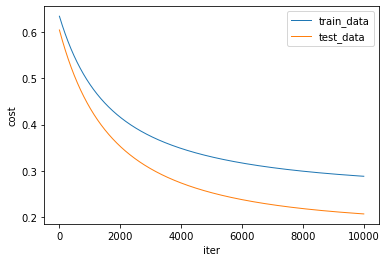

In [101]:
#plt.figure(figsize=(10,5))

plt.plot([i for i in range(scratch.iter)], scratch.loss, linewidth = 1, label='train_data')
plt.plot([i for i in range(scratch.iter)], scratch.val_loss, linewidth = 1, label='test_data')
#plt.plot([i for i in range(tmp.iter)], tmp.val_loss, linewidth = 5, label='test_data')
#plt.xlim(0, 10)
plt.xlabel('iter')
plt.ylabel('cost')
plt.legend()
plt.show()

# 【問題7】決定領域の可視化
決定領域を可視化してください。



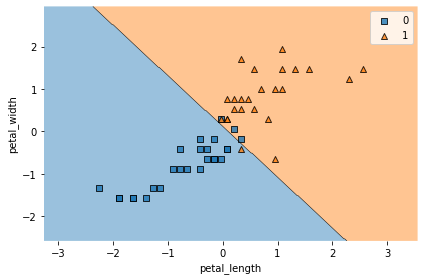

In [105]:
# mlxtendで可視化
from mlxtend.plotting import plot_decision_regions

X = X_train_std
y = y_train

#tmp = LogisticRegression().fit(X, y)

plot_decision_regions(X=X, y=y,clf=scratch)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.legend()

plt.tight_layout()
plt.show()



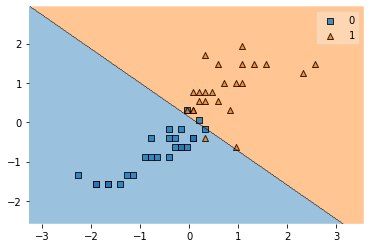

In [118]:
plot_decision_regions(X=X, y=y,clf=clf)

# 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

In [106]:
scratch.coef_

array([-0.13019347,  1.31864363,  1.10461471])

In [107]:
import pickle

weight = scratch.coef_
with open('weight_log', 'wb') as log:
    pickle.dump(weight , log)

In [108]:
with open('weight_log', 'rb') as log:
    weight_log = pickle.load(log)
print(weight_log)

[-0.13019347  1.31864363  1.10461471]


In [109]:
test = ScratchLogisticRegression(num_iter=10000, lr=0.01,C=1.0, bias=False, verbose=True)
test.coef_ = weight_log

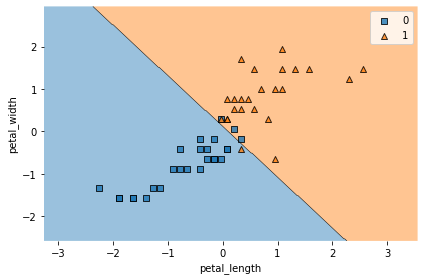

In [110]:
plot_decision_regions(X=X, y=y,clf=test)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.legend()

plt.tight_layout()
plt.show()
